In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Config file not found!")

In [3]:
df = pd.read_csv(config["data"]["raw"])
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [4]:
data = df.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [6]:
data.shape

(114635, 22)

In [7]:
data = data.drop_duplicates()
data.shape

(114381, 22)

In [8]:
data.dtypes

CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object

Here I need to change the type of some columns.

In [9]:
def change_dtype(df, col_list, dtype):
    """
    Change the data type of the given columns.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns' data types are to be changed.
    col_list (list of str): The names of the columns to change.
    dtype (str or type): The new data type.
    
    Returns:
    pd.DataFrame: The DataFrame with changed data types.
    """
    for col in col_list:
        df[col] = df[col].astype(dtype)
    return df


In [10]:
data = change_dtype(data, ['InitialDateReported', 'MostRecentDateReported', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved'], 'datetime64[ns]')

In [11]:
data = change_dtype(data, ['CDPHId', 'PrimaryCategoryId','CompanyId'], 'object')

In [12]:
data.dtypes

CDPHId                            object
ProductName                       object
CSFId                            float64
CSF                               object
CompanyId                         object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategoryId                      int64
SubCategory                       object
CasId                              int64
CasNumber                         object
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate                  object
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
dtype: object

In [13]:
data.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33731
CSF                        34156
CompanyId                      0
CompanyName                    0
BrandName                    227
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6475
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101508
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111396
ChemicalCount                  0
dtype: int64

In [14]:
data.isnull().sum()/len(data)

CDPHId                    0.000000
ProductName               0.000000
CSFId                     0.294900
CSF                       0.298616
CompanyId                 0.000000
CompanyName               0.000000
BrandName                 0.001985
PrimaryCategoryId         0.000000
PrimaryCategory           0.000000
SubCategoryId             0.000000
SubCategory               0.000000
CasId                     0.000000
CasNumber                 0.056609
ChemicalId                0.000000
ChemicalName              0.000000
InitialDateReported       0.000000
MostRecentDateReported    0.000000
DiscontinuedDate          0.887455
ChemicalCreatedAt         0.000000
ChemicalUpdatedAt         0.000000
ChemicalDateRemoved       0.973903
ChemicalCount             0.000000
dtype: float64

Here we can see that 6 columns have missing values. The columns with the highest frequency of missing values are ChemicalDateRemoved with 111396 missing values out of 114381(97%) values in total and DiscontinuedDate with 101508(88%) missing values out of 114381 values in total.
I will drop the column DiscontinuedDate but not ChemicalDateRemoved because I need it later in my analysis.

In [15]:
data.drop(['DiscontinuedDate'], axis=1, inplace=True)

In [16]:
data.shape

(114381, 21)

The column BrandName has a pretty small number of missing values and we will replace those with forward fill:

In [17]:
data['BrandName'].fillna(method='ffill', inplace=True)

After analyzing the columns of my dataframe I realized that I don't need the other three columns (CSFId, CSF, CasNumber) which contain missing values. For this reason I will drop them too and I will have a dataframe without missing values and columns which are not important for my further analyses. 

In [18]:
data.drop(['CSFId', 'CasNumber'], axis=1, inplace=True)

In [19]:
data.shape

(114381, 19)

I have a lot of missing values in the CSF column so I will replace them with the word 'unknown'.

In [20]:
def replace_nan_with_unknown(df, column_name):
    df[column_name].fillna('unknown', inplace=True)
    return df

In [21]:
data = replace_nan_with_unknown(data, 'CSF')

In [22]:
data.isnull().sum()

CDPHId                         0
ProductName                    0
CSF                            0
CompanyId                      0
CompanyName                    0
BrandName                      0
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111396
ChemicalCount                  0
dtype: int64

In [23]:
data.dtypes

CDPHId                            object
ProductName                       object
CSF                               object
CompanyId                         object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategoryId                      int64
SubCategory                       object
CasId                              int64
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
dtype: object

In [24]:
data.nunique()

CDPHId                    36972
ProductName               33716
CSF                       34327
CompanyId                   635
CompanyName                 606
BrandName                  2713
PrimaryCategoryId            13
PrimaryCategory              13
SubCategoryId                92
SubCategory                  89
CasId                       134
ChemicalId                58079
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
ChemicalCount                10
dtype: int64

The columns PrimaryCategoryId and PrimaryCategory have the same number of unique values which means that I can drop one of them.

In [25]:
data['PrimaryCategoryId'].unique()

array([44, 18, 59, 74, 106, 6, 90, 12, 111, 32, 68, 82, 1], dtype=object)

In [26]:
data['PrimaryCategory'].unique()

array(['Makeup Products (non-permanent)',
       'Hair Care Products (non-coloring)', 'Nail Products',
       'Personal Care Products', 'Sun-Related Products', 'Bath Products',
       'Skin Care Products ', 'Fragrances',
       'Tattoos and Permanent Makeup', 'Hair Coloring Products',
       'Oral Hygiene Products', 'Shaving Products', 'Baby Products'],
      dtype=object)

In [27]:
data.drop(['PrimaryCategoryId'], axis=1, inplace=True)

In [30]:
def check_id_counts(data, subcategory_col, id_col):
    """
    Print the number of unique IDs for each unique subcategory.

    Parameters:
    df (pd.DataFrame): The DataFrame to operate on.
    subcategory_col (str): The name of the column containing the subcategories.
    id_col (str): The name of the column containing the IDs.
    """
    id_counts = {subcat: len(df.loc[df[subcategory_col] == subcat, id_col].unique())
                 for subcat in df[subcategory_col].unique()}
    for subcat, count in id_counts.items():
        print(f'{subcat}: {count}')

In [31]:
check_id_counts(data, 'SubCategory', 'SubCategoryId')

Lip Color - Lipsticks, Liners, and Pencils: 1
Hair Shampoos (making a cosmetic claim) : 2
Eyeliner/Eyebrow Pencils: 1
Lip Gloss/Shine: 1
Eye Shadow: 1
Artificial Nails and Related Products: 1
Mascara/Eyelash Products: 1
Hand Cleansers and Sanitizers: 1
Sunscreen (making a cosmetic claim) : 1
UV Gel Nail Polish: 1
Basecoats and Undercoats: 1
Scrubs and Exfoliants: 1
Foundations and Bases: 1
Nail Polish and Enamel: 1
Anti-Wrinkle/Anti-Aging Products (making a cosmetic claim): 1
Skin Moisturizers (making a cosmetic claim): 1
Acne Products (making a cosmetic claim): 1
Facial Masks: 1
Lip Balm (making a cosmetic claim): 1
Skin Astringent (making a cosmetic claim): 1
Skin Bleaching (making a cosmetic claim) : 1
Perfumes - Solids and Powders: 1
Blushes : 1
Bubble and Foam Bath Products: 1
Skin Cleansers: 1
Body Washes and Soaps: 1
Rouges: 1
Face Powders: 1
Skin Toner (making a cosmetic claim): 1
Tattoos and Permanent Makeup: 1
Powders (excluding aftershave, baby powder, and makeup face powder

Here we have 3 subcategories who have each two Ids. I will drop the SubCategoryId column and keep the SubCategory column to later use it for my questions.

In [32]:
data.drop(['SubCategoryId'], axis=1, inplace=True)

The same issue appears for the columns CompanyId and CompanyName where the number of IDs is larger than the number of company names. I will drop here too the Id column.

In [33]:
data.drop(['CompanyId'], axis=1, inplace=True)

In [34]:
data.shape

(114381, 16)

In [35]:
data.to_csv('../data/clean/clean_df.csv', index=False)

In [68]:
data.head()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,unknown,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",656,6,Titanium dioxide,2009-06-17,2013-08-28,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,unknown,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),889,4,Distillates (coal tar),2009-07-01,2009-07-01,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,unknown,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),293,5,Estragole,2009-07-01,2009-07-01,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,unknown,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,656,7,Titanium dioxide,2009-07-09,2013-08-28,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,unknown,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,656,8,Titanium dioxide,2009-07-09,2013-08-28,2009-07-09,2009-07-09,NaT,1


In [ ]:
data.nunique()

CDPHId                    36972
ProductName               33716
CSF                       34327
CompanyName                 606
BrandName                  2713
PrimaryCategory              13
SubCategory                  89
CasId                       134
ChemicalId                58079
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
ChemicalCount                10
dtype: int64

There are 33716 different cosmetic products identified in the retail consumer market represented and sold by 2713 Brands. 

In [61]:
brand_count = data.groupby('BrandName').size().sort_values(ascending=False)
brands = brand_count[brand_count > 2000]
brands

BrandName
SEPHORA                     3394
NYX                         3227
bareMinerals                3158
Charlotte Tilbury           2452
Revlon                      2335
NARS                        2185
Victoria's Secret Beauty    2107
tarte                       2101
dtype: int64

Brands with greater than 2000 produced products who contain or not chemicals.

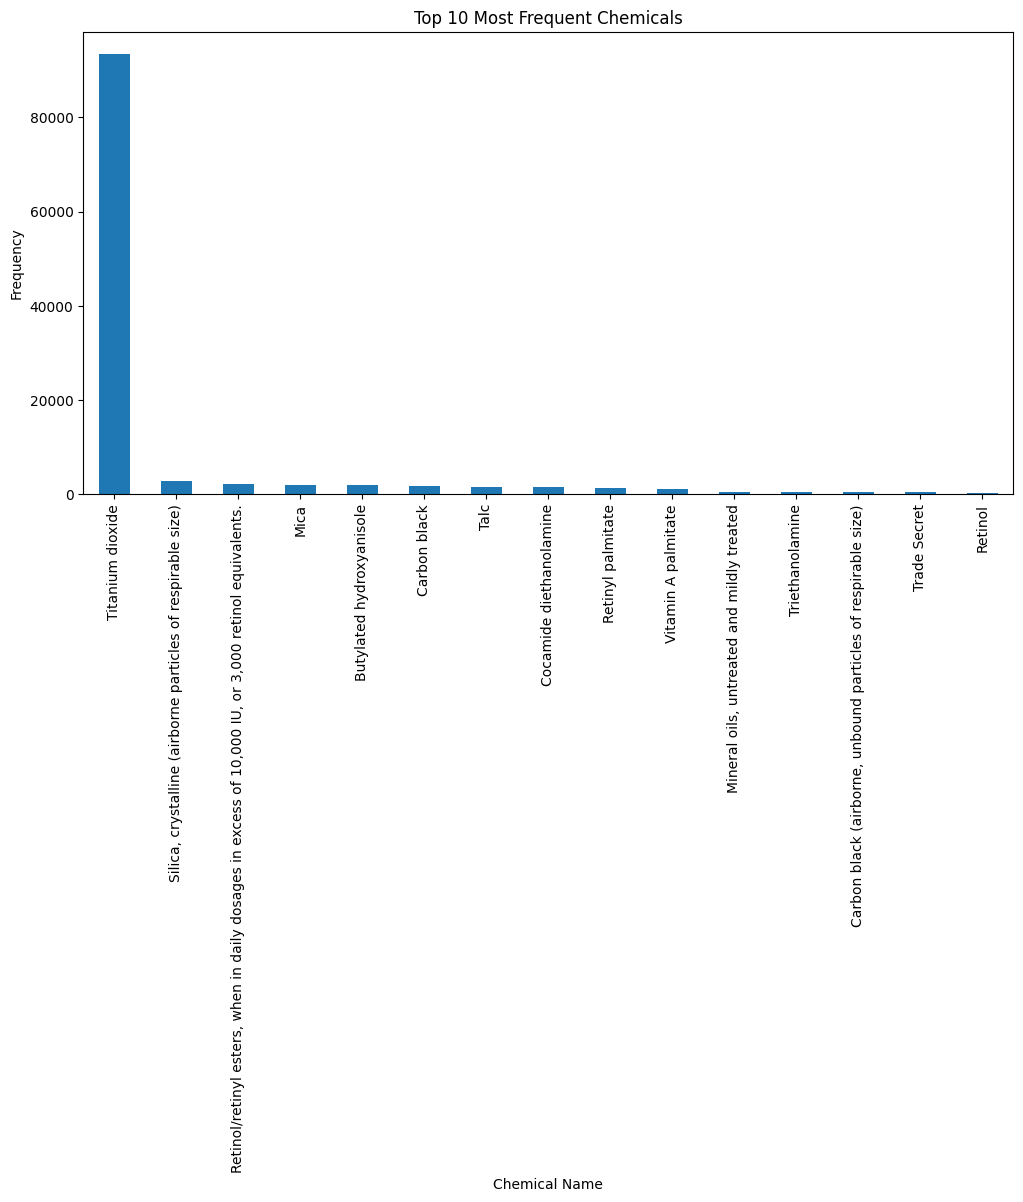

In [55]:
chemical_frequency = data['ChemicalName'].value_counts()
chemical_frequency[:15].plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Most Frequent Chemicals')
plt.xlabel('Chemical Name')
plt.ylabel('Frequency')

plt.show()

In [54]:
num_products_with_titanium_dioxide = data[data['ChemicalName'] == 'Titanium dioxide']['ProductName'].nunique()
total_products = data['ProductName'].nunique()
probability = num_products_with_titanium_dioxide / total_products

print('The probability of choosing a product with Titanium Dioxide is:', probability)

The probability of choosing a product with Titanium Dioxide is: 0.8683710997745877


Each product is categorized among 13 primary categories. Let's see the frequencies of each primary category.

In [37]:
category_frequency = data.groupby('PrimaryCategory').size().sort_values(ascending=False)
category_frequency

PrimaryCategory
Makeup Products (non-permanent)      75822
Nail Products                        15347
Skin Care Products                    7680
Sun-Related Products                  4939
Bath Products                         3463
Hair Coloring Products                1882
Hair Care Products (non-coloring)     1566
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             644
Oral Hygiene Products                  525
Shaving Products                       222
Baby Products                           49
dtype: int64

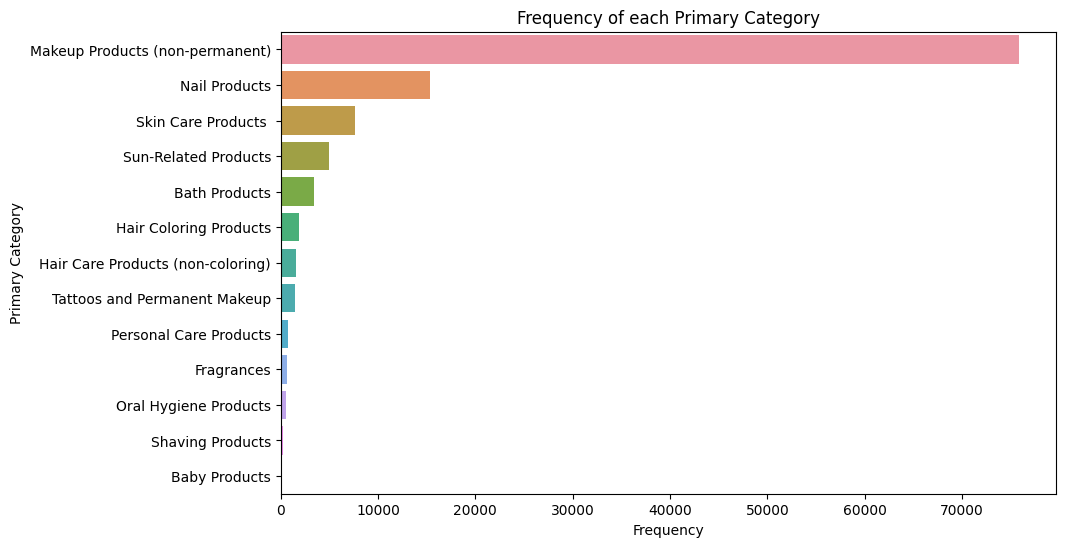

In [38]:
plot_data = pd.DataFrame({ 'Primary Category': category_frequency.index, 'Frequency': category_frequency.values })
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Frequency', y='Primary Category', data=plot_data, orient='h')
plt.title('Frequency of each Primary Category')
plt.show()
ax.get_figure().savefig("../images/frequency_of_primary_categories.png")

The category Makeup Products has the highest number of products who contain chemicals and Baby Products is the category with the lowest frequency which makes sense because a baby's skin is very delicate and the products should be too.

In [39]:
data['ChemicalName'].nunique()

123

There are 123 different chemicals reported. 

In [40]:
chemicals_frequency = data['ChemicalName'].value_counts()
print(chemicals_frequency)

ChemicalName
Titanium dioxide                                                                                       93479
Silica, crystalline (airborne particles of respirable size)                                             2816
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1919
Butylated hydroxyanisole                                                                                1888
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extrac

Titanium dioxide is the most used chemical in cosmetic products and the difference to other chemicals is significant.

In [41]:
data['ChemicalCount'].unique()

array([1, 2, 0, 3, 5, 4, 7, 8, 9, 6])

In [42]:
df['ChemicalCount'].describe()

count    114635.000000
mean          1.288359
std           0.636418
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: ChemicalCount, dtype: float64

In average, products contain at least one chemical. There are products with 0 chemicals and with 9 reported chemicals

Let's see the distribution of products by their chemical count:

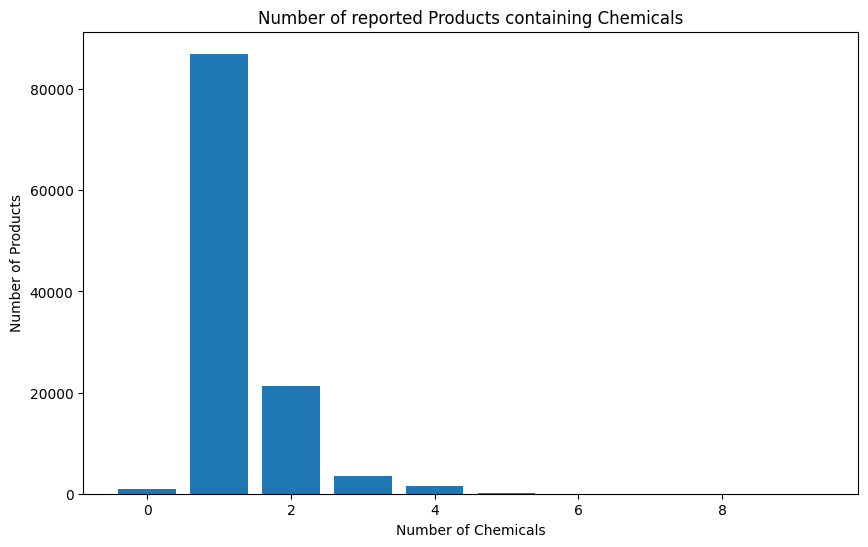

In [43]:
product_chemical_count = data.groupby('ChemicalCount').size()
plt.figure(figsize=(10,6))
plt.bar(product_chemical_count.index, product_chemical_count.values)
plt.title('Number of reported Products containing Chemicals')
plt.xlabel('Number of Chemicals')
plt.ylabel('Number of Products')
plt.savefig("../images/Nr_of_products_with_chemicals.png")
plt.show()

In [44]:
data.loc[data.ChemicalCount==0].head()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
31,24,White Premium Lotion Soap,unknown,"GOJO Industries, Inc.",GOJO�,Personal Care Products,Hand Cleansers and Sanitizers,162,26,Cocamide diethanolamine,2009-07-23,2012-02-07,2009-07-23,2012-02-07,2010-12-30,0
497,333,Gentle Cleanser,unknown,"Sunrider Manufacturing, L.P.",Kandesn,Bath Products,Body Washes and Soaps,162,350,Cocamide diethanolamine,2009-09-02,2013-09-16,2009-09-02,2013-09-16,2009-11-23,0
498,334,Cleansing Foam,unknown,"Sunrider Manufacturing, L.P.",Kandesn,Skin Care Products,Skin Cleansers,162,351,Cocamide diethanolamine,2009-09-02,2013-09-16,2009-09-02,2009-09-03,2009-09-02,0
499,334,Cleansing Foam,unknown,"Sunrider Manufacturing, L.P.",Kandesn,Skin Care Products,Skin Cleansers,162,412,Cocamide diethanolamine,2009-09-02,2013-09-16,2009-09-03,2013-12-05,2009-09-02,0
500,334,Cleansing Foam,unknown,"Sunrider Manufacturing, L.P.",Kandesn,Skin Care Products,Skin Cleansers,773,453,"Retinol/retinyl esters, when in daily dosages ...",2009-09-02,2013-09-16,2009-09-03,2013-12-05,2103-12-05,0


In [45]:
data.loc[data.ChemicalCount==9].head()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
60819,22212,Moisturizing Shampoo,unknown,Regis Corporation,Regis Design Line,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),270,33796,"1,4-Dioxane",2014-02-04,2014-02-04,2014-02-04,2014-02-04,NaT,9
60820,22212,Moisturizing Shampoo,unknown,Regis Corporation,Regis Design Line,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),9,33797,Acrylamide,2014-02-04,2014-02-04,2014-02-04,2014-02-04,NaT,9
60821,22212,Moisturizing Shampoo,unknown,Regis Corporation,Regis Design Line,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),715,33798,Arsenic (inorganic arsenic compounds),2014-02-04,2014-02-04,2014-02-04,2014-02-04,NaT,9
60822,22212,Moisturizing Shampoo,unknown,Regis Corporation,Regis Design Line,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),214,33799,Dichloroacetic acid,2014-02-04,2014-02-04,2014-02-04,2014-02-04,NaT,9
60823,22212,Moisturizing Shampoo,unknown,Regis Corporation,Regis Design Line,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),311,33800,Ethylene oxide,2014-02-04,2014-02-04,2014-02-04,2014-02-04,NaT,9


The cleaniest company reported is Sunrider Manufacturing L.P whose products have 0 number of chemicals.
The company whose products has the highest number of chemicals (9) is Regis Corporation and the product is Moisturizing Shampoo.

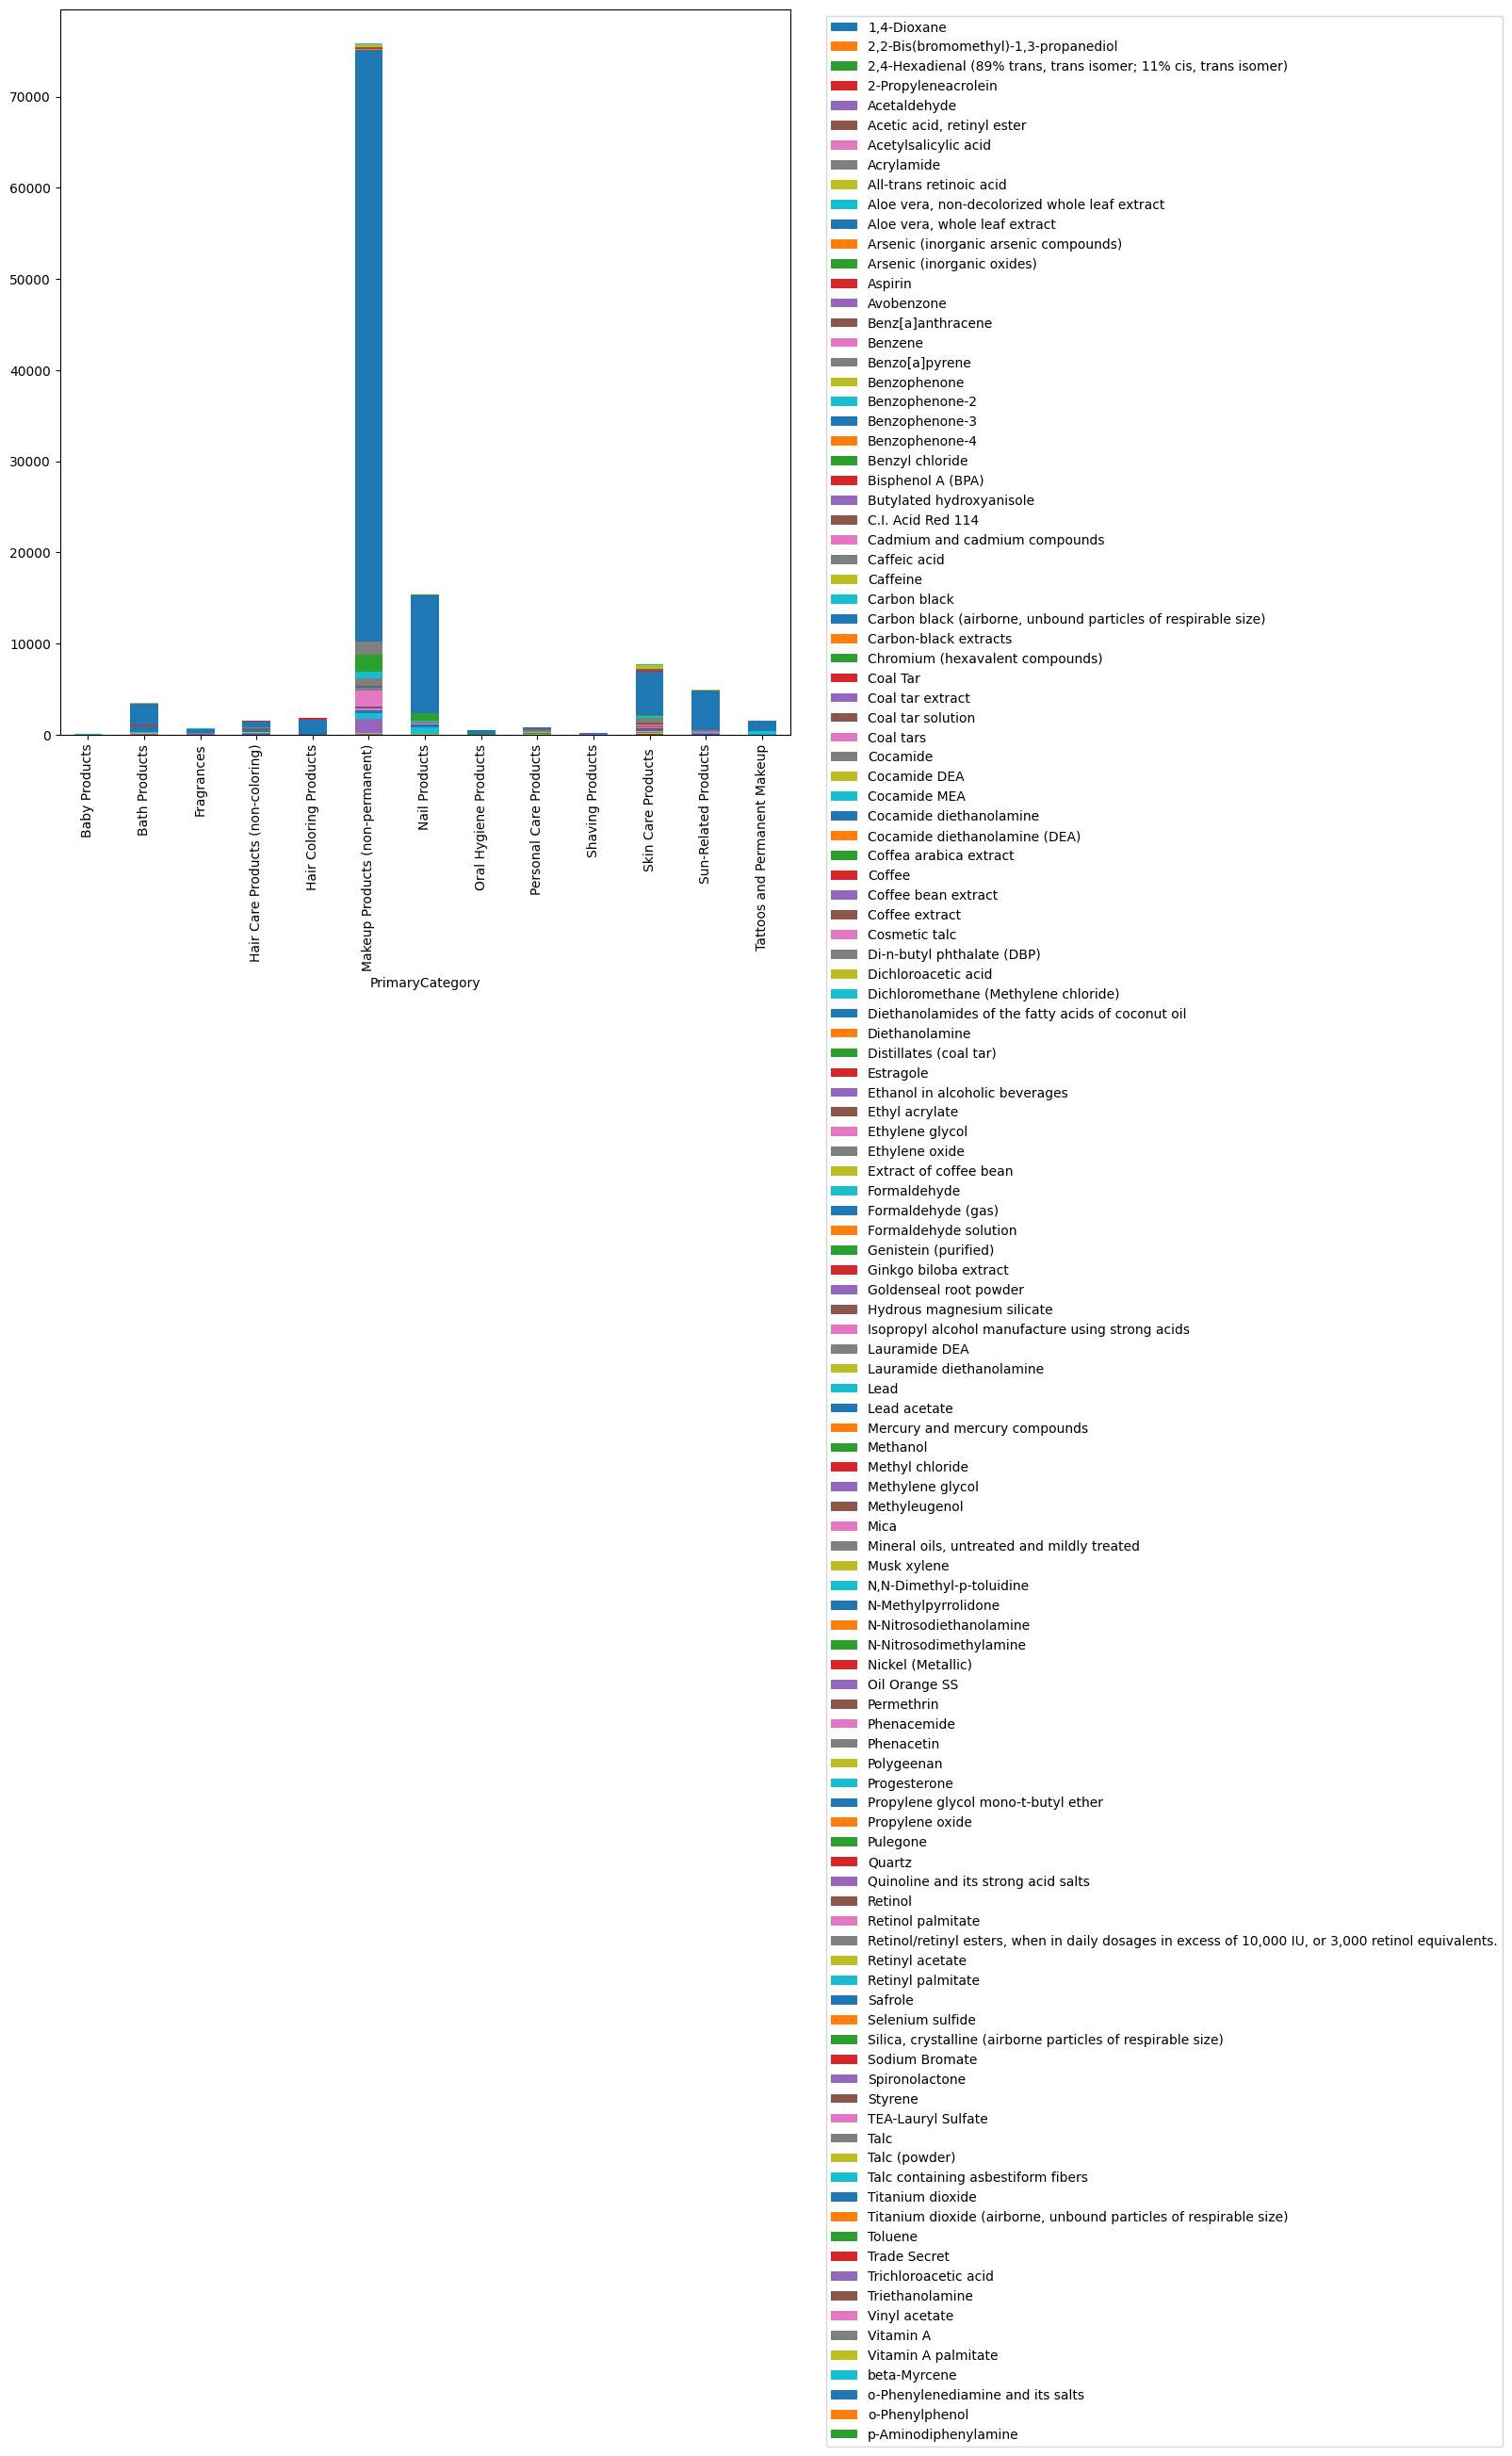

In [46]:
pivot_df = data.pivot_table(index='PrimaryCategory', columns='ChemicalName', values='CDPHId', aggfunc='count')
ax = pivot_df.loc[:,:].plot.bar(stacked=True, figsize=(10,10))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.figure.savefig("../images/chemical_distribution.png")
#plt.tight_layout()
plt.show()

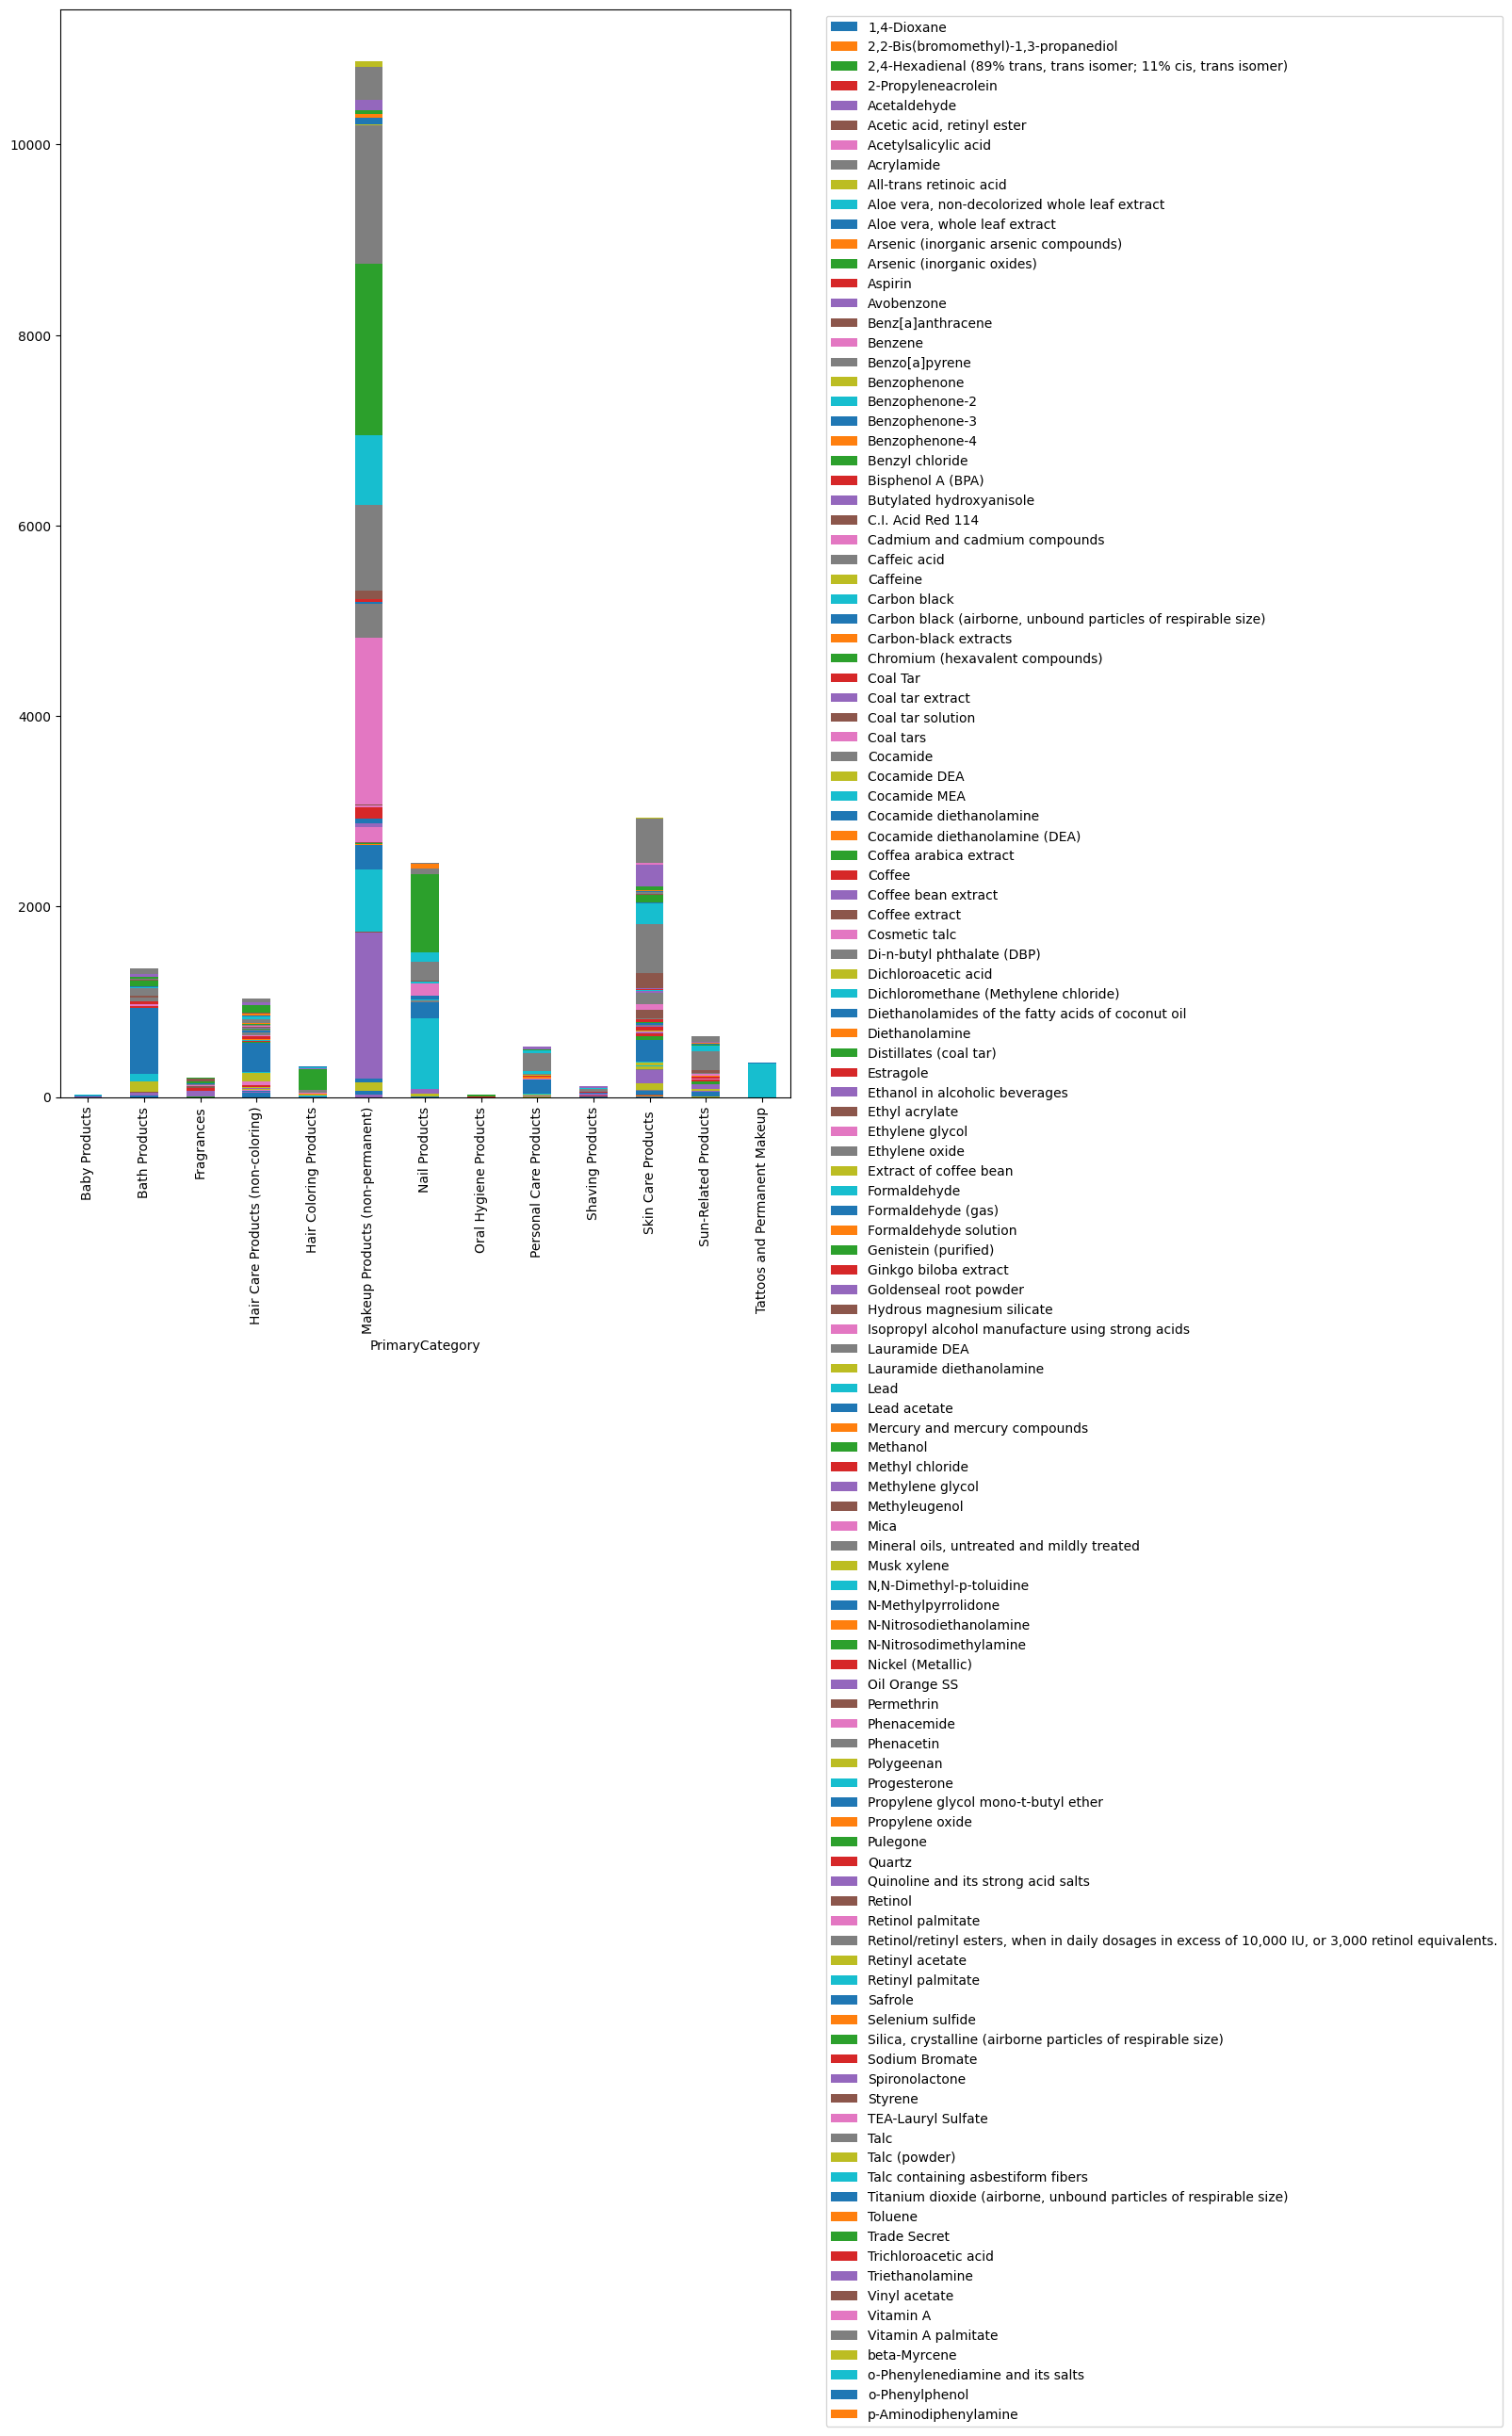

In [48]:
ax = pivot_df.loc[:,pivot_df.columns !='Titanium dioxide'].plot.bar(stacked=True, figsize=(10,15))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.figure.savefig("../images/distribution_without_titanium.png")